In [13]:
!pip install autoviml

In [0]:
#Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data = pd.read_csv("/content/drive/My Drive/People Charm case.csv")

In [16]:
data.head(10)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
5,0.10,0.77,6,247,4,0,1,0,sales,low
6,0.92,0.85,5,259,5,0,1,0,sales,low
7,0.42,0.53,2,142,3,0,1,0,sales,low
8,0.45,0.54,2,135,3,0,1,0,sales,low
9,0.11,0.81,6,305,4,0,1,0,sales,low


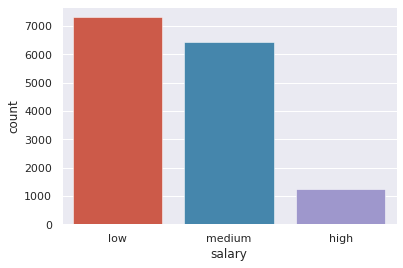

In [17]:
sns.countplot(data["salary"])

In [0]:
from autoviml.Auto_ViML import Auto_ViML

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size=0.20)

**# Important Parameters:**

**1. Boosting Flag**: you have 3 possible choices (default is False):

**None**This will build a Linear Model

**False**This will build a Random Forest or Extra Trees model (also known as Bagging)

**True** This will build an XGBoost model

**2. Binning_Flag**:
 Default is False. It set to True, it will convert the top numeric variables into binned variables through a technique known as "Entropy" binning. This is very helpful for certain datasets (especially hard to build models).

**3. Imbalanced_Flag:**
 Default is False. If set to True, it will downsample the "Majority Class" in an imbalanced dataset and make the "Rare" class at least 5% of the data set. This the ideal threshold in my mind to make a model learn. Do it for Highly Imbalanced data.


##############  D A T A   S E T  A N A L Y S I S  #######################
Changing hyperparameter search to RS. Otherwise, Random Forests will take too long for 10,000+ rows
Training Set Shape = (11999, 10)
    Training Set Memory Usage = 1.01 MB
Test Set Shape = (3000, 10)
    Test Set Memory Usage = 0.25 MB
Single_Label Target: ['salary']
ALERT! Setting Imbalanced_Flag to True in Auto_ViML for Multi_Classification problems improves results!
Shuffling the data set before training
 Class  -> Counts -> Percent
medium:    5145  ->   42.9%
   low:    5867  ->   48.9%
  high:     987  ->    8.2%
Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
String or Multi Class target: salary transformed as follows: {'low': 0, 'medium': 1, 'high': 2}
Alert! Rare Class is not 1 but 2 in this data set
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of

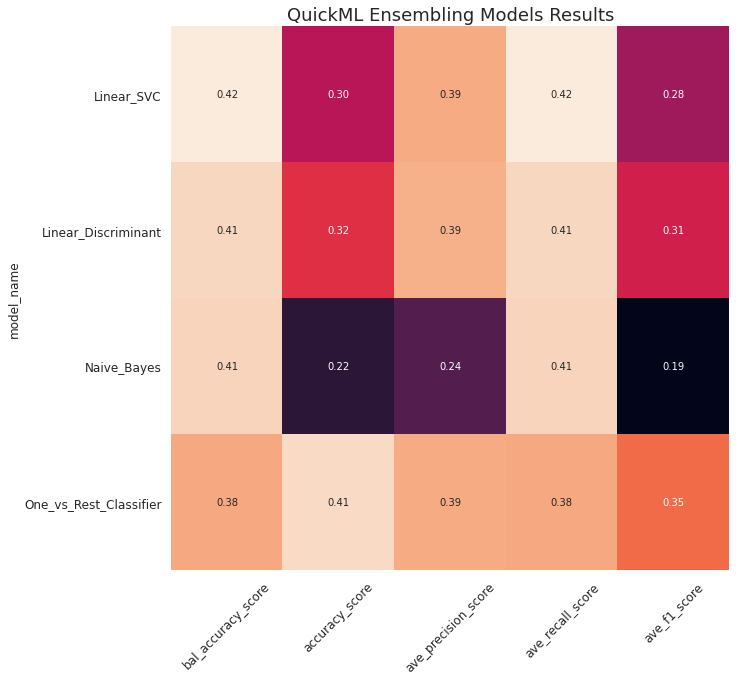

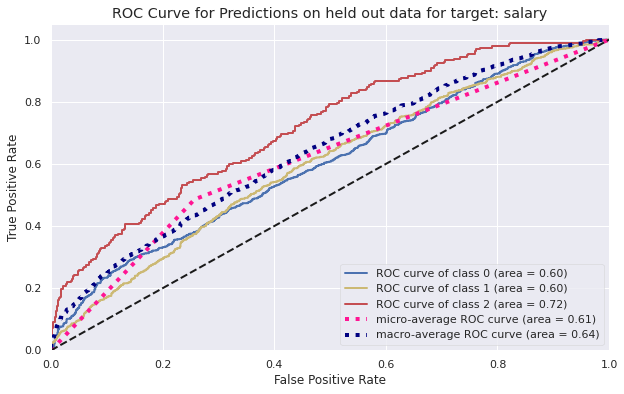

Average precision score, micro-averaged over all classes: 0.54
Macro F1 score, averaged over all classes: 0.43


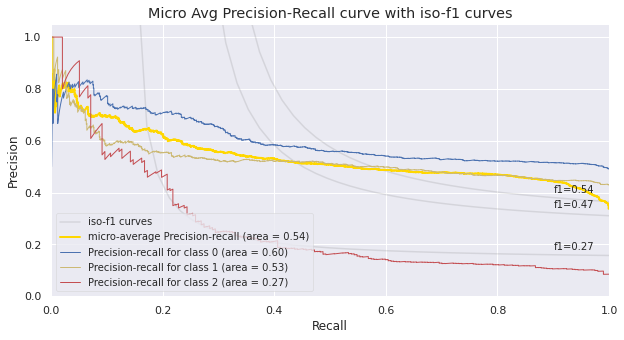

After multiple models, Ensemble Model Results:
    Balanced Accuracy Score = 44.096%
              precision    recall  f1-score   support

           0       0.58      0.40      0.47      1174
           1       0.47      0.62      0.54      1029
           2       0.25      0.30      0.27       197

    accuracy                           0.49      2400
   macro avg       0.43      0.44      0.43      2400
weighted avg       0.51      0.49      0.48      2400

[[471 615  88]
 [298 635  96]
 [ 43  94  60]]
#############################################################################
Single Model is better than Ensembling Models for this data set.


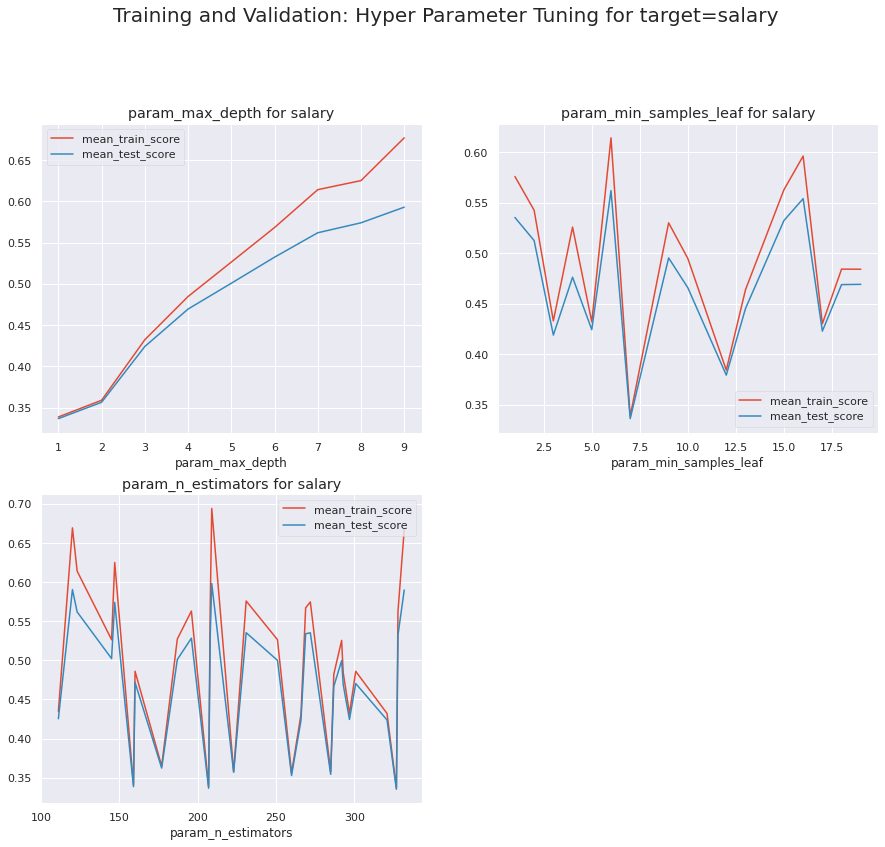

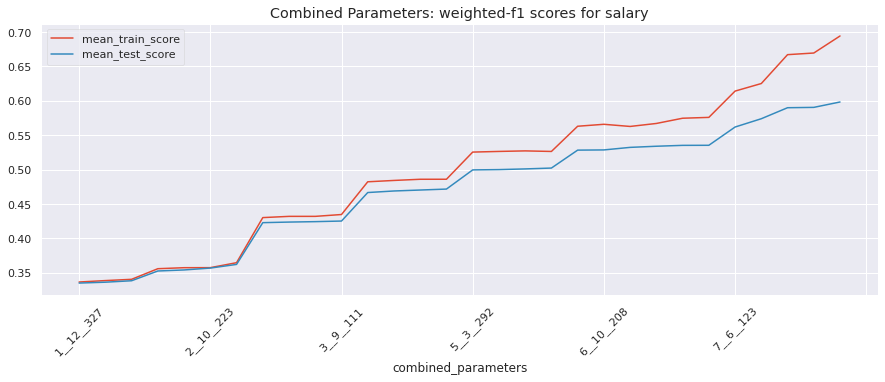

    Time taken for this Target (in seconds) = 258
Training model on complete Train data and Predicting using give Test Data...
    Binning_Flag set to False or there are no numeric vars in data set to be binned
Feature scaling for total 9 float and integer variables completed using MinMaxScaler(copy=True, feature_range=(0, 1))...
##################  Imbalanced Flag Set  ############################
Imbalanced Class Training using SMOTE Rare Class Oversampling method...
    Number of Rare Class samples = 987
    Number of K Neighbors selected for SMOTE = 10
    Pct of Rare Class in data = 8.23%
Using SMOTE's over-sampling techniques to make the 3 classes balanced...
    SMOTE completed. Actual time taken = 0 seconds
##################  Training CalibratedClassifierCV on Imbalanced data...  ################
Imbalanced class training completed.
Actual Training time taken in seconds = 1
    Calculating weighted average ensemble of 5 classifiers
#############################################

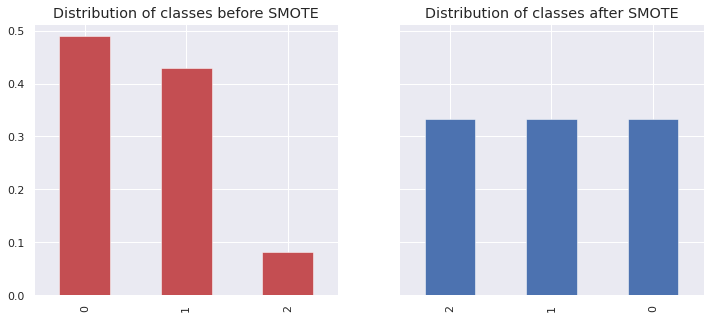

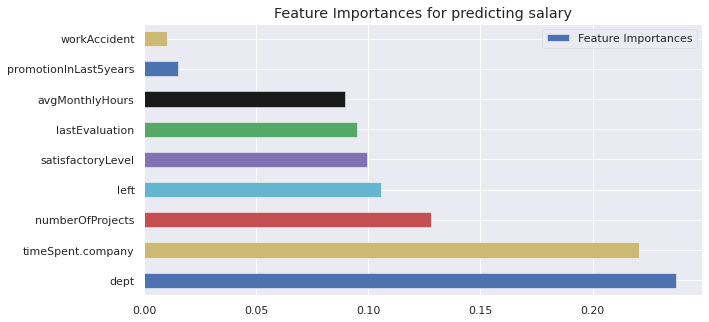

In [20]:
target = "salary"
model, features, trainm, testm = Auto_ViML(
    train,
    target,
    test,
    hyper_param="GS",
    feature_reduction=True,
    scoring_parameter="weighted-f1",
    Boosting_Flag=False,
    Imbalanced_Flag=True,
    verbose=1,
)

In [21]:
testm

,left,promotionInLast5years,dept,timeSpent.company,avgMonthlyHours,lastEvaluation,satisfactoryLevel,numberOfProjects,workAccident,salary_predictions,salary_proba_low,salary_proba_medium,salary_proba_high,salary_Linear_Discriminant_predictions,salary_Linear_SVC_predictions,salary_Naive_Bayes_predictions,salary_One_vs_Rest_Classifier_predictions,salary_Forests_predictions,salary_Ensembled_predictions
872,1.00,0.00,0.78,0.25,0.82,0.88,0.01,0.60,0.00,low,0.69,0.30,0.01,low,low,low,low,low,low
5086,0.00,0.00,0.78,0.12,0.48,0.86,0.51,0.40,0.00,medium,0.38,0.55,0.07,medium,medium,high,low,medium,medium
9305,0.00,0.00,0.56,0.12,0.45,0.77,0.74,0.20,0.00,high,0.22,0.25,0.52,medium,medium,high,low,high,high
12075,0.00,0.00,0.33,0.12,0.37,0.31,0.57,0.40,0.00,medium,0.32,0.51,0.17,high,high,high,high,medium,high
10983,0.00,0.00,0.89,0.12,0.83,0.48,0.43,0.60,0.00,medium,0.31,0.50,0.19,high,high,high,high,medium,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3302,0.00,0.00,0.00,0.12,0.40,0.83,0.74,0.40,0.00,medium,0.33,0.54,0.13,medium,high,high,high,medium,medium
10186,0.00,0.00,0.78,0.25,0.65,0.28,0.95,0.40,0.00,medium,0.33,0.45,0.22,high,high,high,high,medium,high
11014,0.00,0.00,0.78,0.25,0.66,0.89,0.59,0.40,0.00,medium,0.29,0.64,0.07,medium,medium,high,low,medium,medium
13785,0.00,0.00,1.00,0.00,0.54,0.23,0.85,0.40,1.00,low,0.62,0.33,0.05,low,high,high,low,low,low


In [22]:
from sklearn.metrics import classification_report

#Naive Bayes Classification report
print(classification_report(test["salary"], testm["salary_Naive_Bayes_predictions"]))

              precision    recall  f1-score   support

        high       0.10      0.91      0.18       250
         low       0.59      0.29      0.39      1449
      medium       0.00      0.00      0.00      1301

    accuracy                           0.22      3000
   macro avg       0.23      0.40      0.19      3000
weighted avg       0.29      0.22      0.20      3000



In [23]:
#Forest Classification report
print(classification_report(test["salary"], testm["salary_Forests_predictions"]))

              precision    recall  f1-score   support

        high       0.20      0.25      0.22       250
         low       0.57      0.38      0.46      1449
      medium       0.47      0.62      0.53      1301

    accuracy                           0.47      3000
   macro avg       0.41      0.42      0.40      3000
weighted avg       0.49      0.47      0.47      3000



In [24]:
#Esembled classification Report
print(classification_report(test["salary"], testm["salary_Ensembled_predictions"]))

              precision    recall  f1-score   support

        high       0.11      0.54      0.18       250
         low       0.57      0.35      0.43      1449
      medium       0.46      0.30      0.36      1301

    accuracy                           0.34      3000
   macro avg       0.38      0.40      0.32      3000
weighted avg       0.48      0.34      0.38      3000



In [25]:
model


CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=9,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=4,
                                                             min_samples_split=2,
                                  